In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import sympy as smp

from rwa_tools import (
    create_coupling_graph,
    create_hamiltonian_symbolic,
    create_hamiltonian_rwa,
)
from rwa_tools.graph_transform import create_transform_matrix

In [2]:
nstates = 5
couplings = [[(0, 4), (1, 4)], [(2, 4), (3, 4)], [(1, 3)], [(0, 4), (1, 4)]]
hamiltonian = create_hamiltonian_symbolic(couplings, nstates)
coupling_graph = create_coupling_graph(couplings, nstates=nstates)

In [3]:
hamiltonian.total

Matrix([
[                                                         E0,                                                           0,                            0,                            0, Ω0*exp(I*t*ω0)/2 + Ω3*exp(I*t*ω3)/2],
[                                                          0,                                                          E1,                            0,             Ω2*exp(I*t*ω2)/2, Ω0*exp(I*t*ω0)/2 + Ω3*exp(I*t*ω3)/2],
[                                                          0,                                                           0,                           E2,                            0,                    Ω1*exp(I*t*ω1)/2],
[                                                          0,                                exp(-I*t*ω2)*conjugate(Ω2)/2,                            0,                           E3,                    Ω1*exp(I*t*ω1)/2],
[exp(-I*t*ω3)*conjugate(Ω3)/2 + exp(-I*t*ω0)*conjugate(Ω0)/2, exp(-I*t*ω3)*conjugate(Ω3)/2 + exp(-I*t*ω0)*c

In [4]:
coupling_graph.edges

MultiEdgeView([(0, 4, 0), (0, 4, 1), (1, 4, 0), (1, 4, 1), (1, 3, 0), (2, 4, 0), (3, 4, 0)])

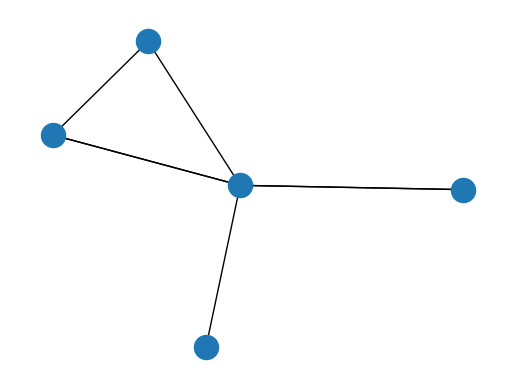

In [5]:
fig, ax = plt.subplots()
nx.draw(coupling_graph)

In [6]:
hamiltonian.total

Matrix([
[                                                         E0,                                                           0,                            0,                            0, Ω0*exp(I*t*ω0)/2 + Ω3*exp(I*t*ω3)/2],
[                                                          0,                                                          E1,                            0,             Ω2*exp(I*t*ω2)/2, Ω0*exp(I*t*ω0)/2 + Ω3*exp(I*t*ω3)/2],
[                                                          0,                                                           0,                           E2,                            0,                    Ω1*exp(I*t*ω1)/2],
[                                                          0,                                exp(-I*t*ω2)*conjugate(Ω2)/2,                            0,                           E3,                    Ω1*exp(I*t*ω1)/2],
[exp(-I*t*ω3)*conjugate(Ω3)/2 + exp(-I*t*ω0)*conjugate(Ω0)/2, exp(-I*t*ω3)*conjugate(Ω3)/2 + exp(-I*t*ω0)*c

In [7]:
hamiltonian.coupling_matrix

Matrix([
[                                                          0,                                                           0,                            0,                            0, Ω0*exp(I*t*ω0)/2 + Ω3*exp(I*t*ω3)/2],
[                                                          0,                                                           0,                            0,             Ω2*exp(I*t*ω2)/2, Ω0*exp(I*t*ω0)/2 + Ω3*exp(I*t*ω3)/2],
[                                                          0,                                                           0,                            0,                            0,                    Ω1*exp(I*t*ω1)/2],
[                                                          0,                                exp(-I*t*ω2)*conjugate(Ω2)/2,                            0,                            0,                    Ω1*exp(I*t*ω1)/2],
[exp(-I*t*ω3)*conjugate(Ω3)/2 + exp(-I*t*ω0)*conjugate(Ω0)/2, exp(-I*t*ω3)*conjugate(Ω3)/2 + exp(-I*t*ω0)*c

In [8]:
hamiltonian.coupling_symbol_paths

{(0, 4): [ω0, ω3], (1, 4): [ω0, ω3], (2, 4): [ω1], (3, 4): [ω1], (1, 3): [ω2]}

In [9]:
T = create_transform_matrix(coupling_graph, hamiltonian.coupling_symbol_paths)

In [10]:
hamiltonian_rwa = create_hamiltonian_rwa(hamiltonian, T)
hamiltonian_rwa.hamiltonian

Matrix([
[                                                    δ0,                                                            0,               0,                                                0, Ω0/2 + Ω3*exp(-I*t*δ0 + I*t*δ3)/2],
[                                                     0,                                                -E0 + E1 + δ0,               0, Ω2*exp(I*t*(E0 - E1 - E2 + E3 - δ0 + δ1 + δ2))/2, Ω0/2 + Ω3*exp(-I*t*δ0 + I*t*δ3)/2],
[                                                     0,                                                            0,              δ1,                                                0,                              Ω1/2],
[                                                     0, exp(I*t*(-E0 + E1 + E2 - E3 + δ0 - δ1 - δ2))*conjugate(Ω2)/2,               0,                                    -E2 + E3 + δ1,                              Ω1/2],
[exp(I*t*δ0 - I*t*δ3)*conjugate(Ω3)/2 + conjugate(Ω0)/2,       exp(I*t*δ0 - I*t*δ3)*conjugate(Ω3)/2 + c